In [1]:
import matplotlib.pyplot as plt
import numpy as np

sts=["fcis_train", "fcis_test", "bond_train","bond_test", "bonds", "test_fidelities", "train_fidelities","fcisfull"]
fcis_train = np.load("H2/fcis_train.npy")
fcis_test = np.load("H2/fcis_test.npy")
bond_train = np.load("H2/bond_train.npy")
bond_test = np.load("H2/bond_test.npy")
bonds = np.linspace(0.5,2.3,100)
                    
test_fidelities = np.load("H2/test_fidelities.npy")
train_fidelities = np.load("H2/train_fidelities.npy")
fcisfull=np.load("H2/fcisfull.npy")





In [2]:

color1="#D79922"
color2="#4056A1"
color3="#F13C20"
color4="#5D001E"
color5="#8E8D8A"
import matplotlib

plt.style.use('../plots/style.mplstyle')
matplotlib.rc("text",usetex=True)
plt.rcParams["font.family"] = "Times New Roman"

import matplotlib.colors as colors
converter = colors.ColorConverter()
plt.rcParams.update({'font.size': 45})


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


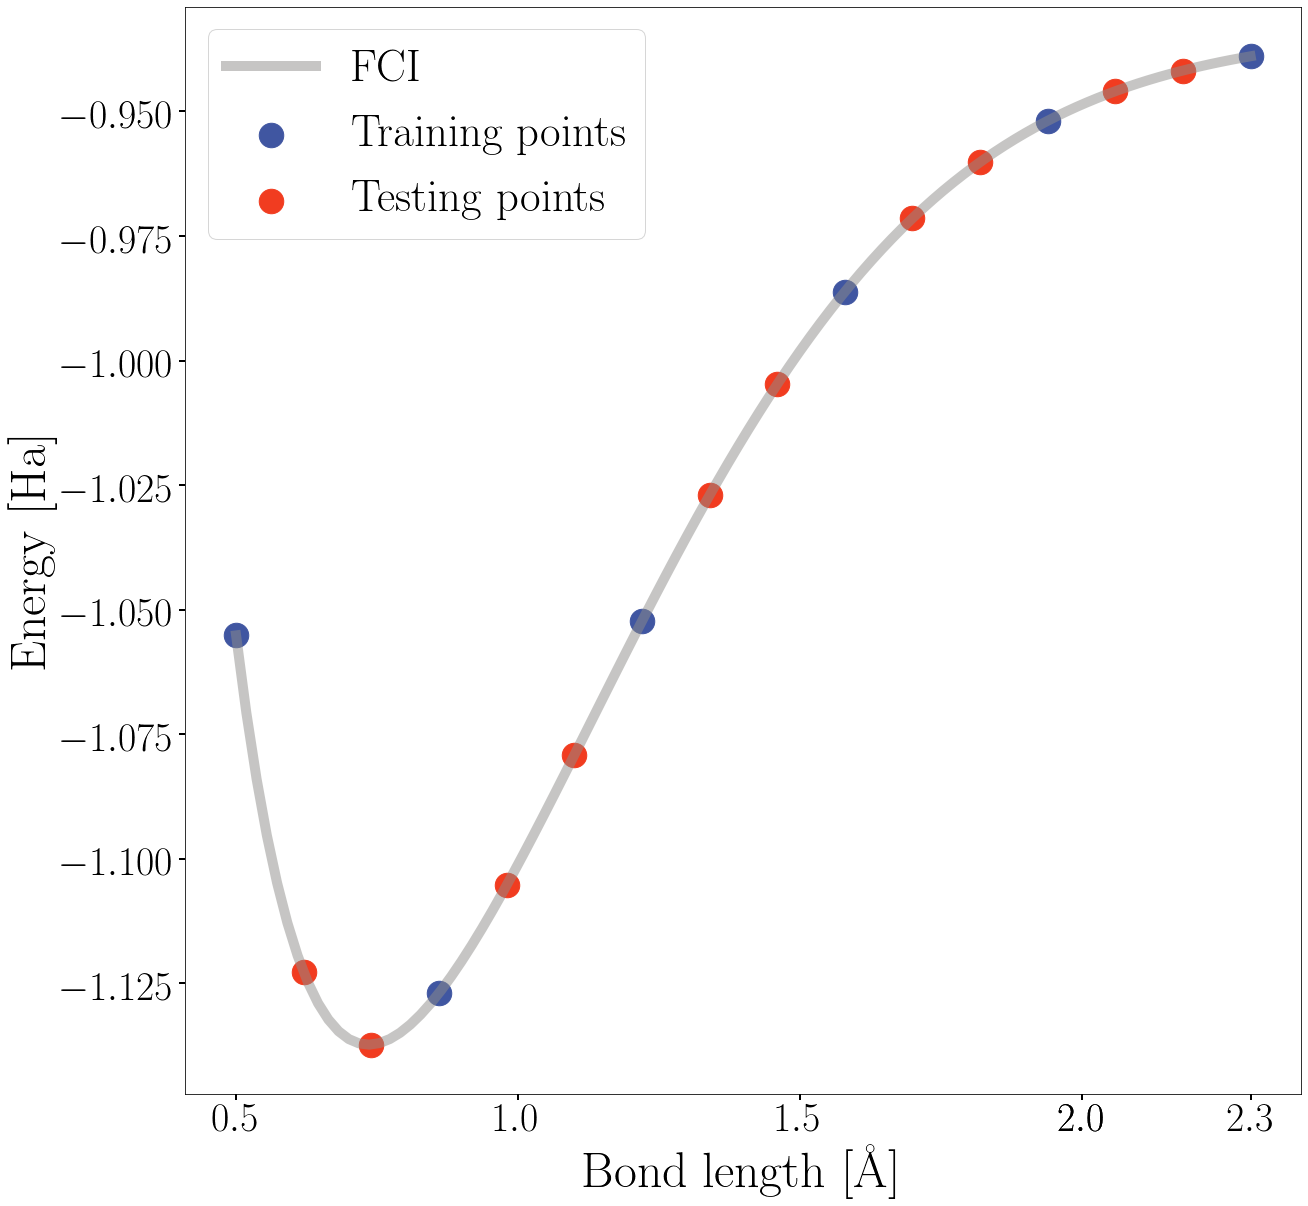

In [3]:
plt.figure(figsize=(20,20))
plt.plot(np.linspace(0.5,2.3,100),fcisfull,color=converter.to_rgb(color5),linewidth=10,alpha=0.5,label="FCI")
plt.scatter(bond_train, fcis_train,s=600, color=converter.to_rgb(color2),label="Training points")
plt.scatter(bond_test, fcis_test, s=600,color=converter.to_rgb(color3),label="Testing points")
plt.tick_params(direction='out', length=6, width=2, colors='black', grid_alpha=0.5,labelsize=40)
plt.xticks([0.5,2.0,1.0,1.5,2.0,2.3])
plt.xlabel("Bond length [Å]")
plt.ylabel("Energy [Ha]")
plt.legend(prop={"size":45})
plt.savefig("energies.pdf",format="pdf")

In [4]:
import os
os.chdir("/home/cooper-cooper/Desktop/vans/")
from utilities.variational import VQE
from utilities.evaluator import Evaluator
from utilities.idinserter import IdInserter
import pickle

In [5]:
os.getcwd()

'/home/cooper-cooper/Desktop/vans'

In [15]:
with open("../data-vans/AutoencoderH2/N4_AUTOENCODERH2_3_quiet/run_18/evolution.pkl","rb") as f:
    evo = pickle.load(f)

In [16]:
antifidelities=[]
for k in list(evo.values()):
    antifidelities.append(k[1])
antifidelities

[<tf.Tensor: shape=(), dtype=float32, numpy=0.24148107>,
 array(0.06748676, dtype=float32),
 array(0.06748635, dtype=float32),
 array(0.06738782, dtype=float32),
 array(0.05948973, dtype=float32),
 array(0.00225836, dtype=float32),
 array(0.00119203, dtype=float32),
 array(0.00099236, dtype=float32),
 array(0.00025755, dtype=float32),
 array(8.8870525e-05, dtype=float32),
 array(5.275011e-05, dtype=float32),
 array(4.5895576e-06, dtype=float32),
 array(2.682209e-06, dtype=float32),
 array(2.682209e-06, dtype=float32),
 array(7.1525574e-07, dtype=float32),
 array(4.7683716e-07, dtype=float32),
 array(9.536743e-07, dtype=float32)]

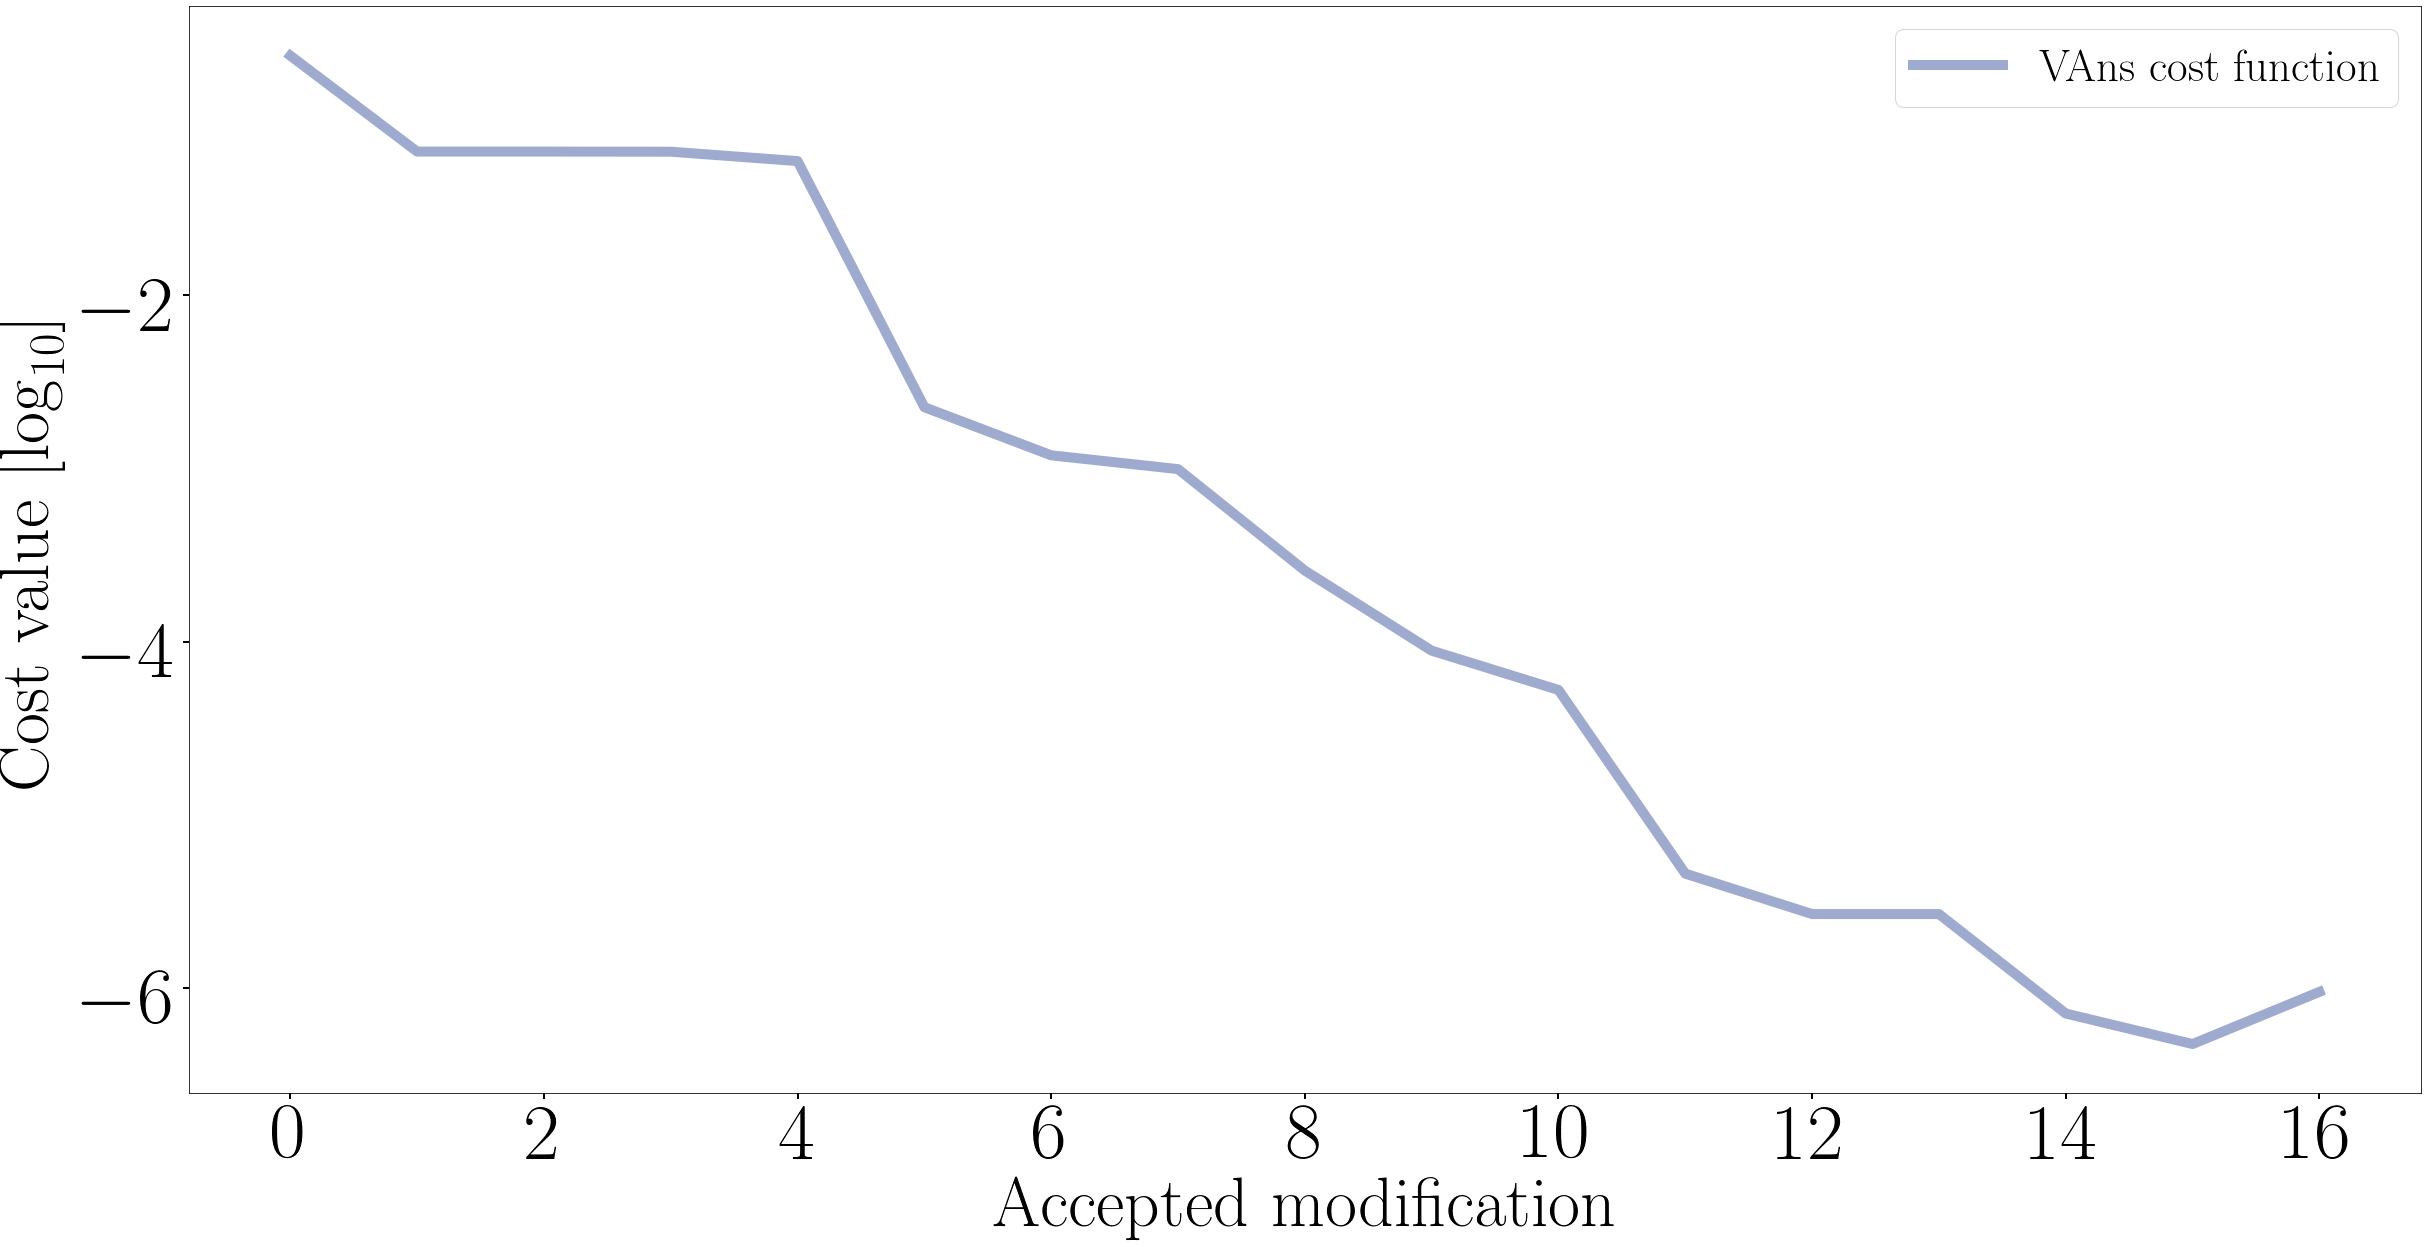

In [21]:

color1="#D79922"
color2="#4056A1"
color3="#F13C20"
color4="#5D001E"
color5="#8E8D8A"
import matplotlib

plt.style.use('results/plots/style.mplstyle')
matplotlib.rc("text",usetex=True)
plt.rcParams["font.family"] = "Times New Roman"

import matplotlib.colors as colors
converter = colors.ColorConverter()
plt.rcParams.update({'font.size': 45})


plt.figure(figsize=(40,20))
plt.plot(np.log10(antifidelities),color=converter.to_rgb(color2),linewidth=10,alpha=0.5,label="VAns cost function")
plt.tick_params(direction='out', length=6, width=2, colors='black', grid_alpha=0.5,labelsize=80)
#plt.xticks([0.5,2.0,1.0,1.5,2.0,2.3])
plt.xlabel("Accepted modification",size=70)
plt.ylabel("Cost value "+r'$[\log _{10}]$',size=70)
plt.legend(prop={"size":45})

plt.savefig("charlacostautoen.pdf",format="pdf")



findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


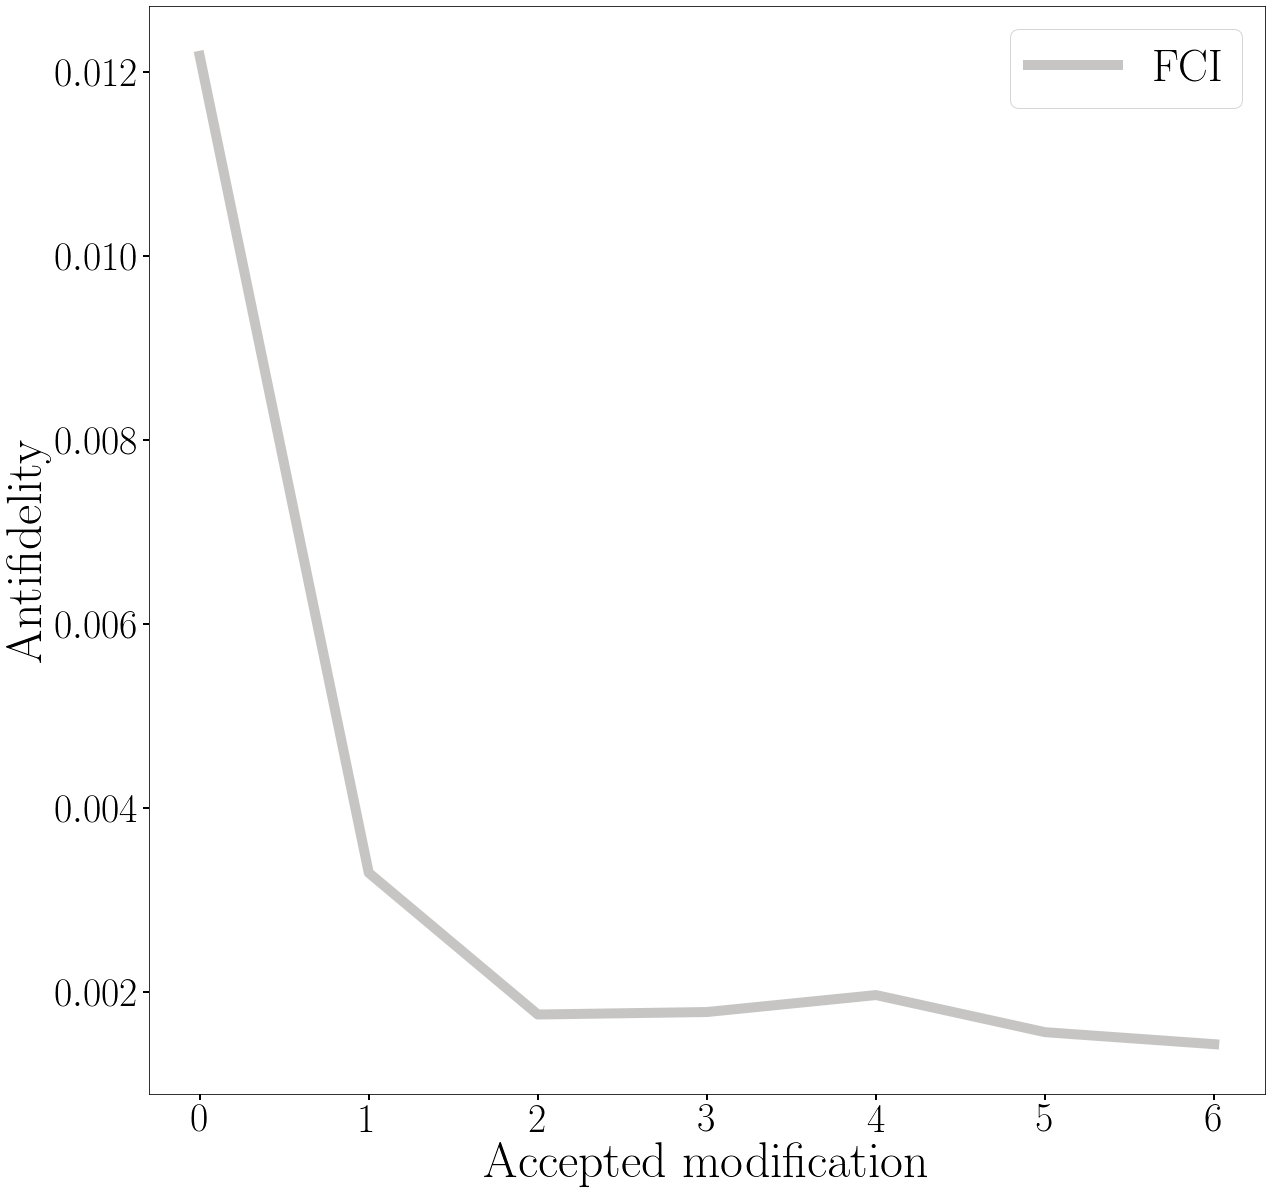